#  Regresion Lineal 
###  (intercepto y pendiente) 

A continuación, se presenta el método de regresión lineal para la obtencion de pronósticos numéricos.
Se utiliza el $\textit{dataset}$ de admisiones obtenido del sitio web:

https://www.kaggle.com/mohansacharya/graduate-admissions

Para la obtención de los resultados, se calcula por el método analítico (solución cerrada) hecho paso a paso con la ecuación que genera el resultado y por medio del descenso gradiente, método iterativo que busca aproximar el resultado.

Por otro lado, para contrastar, también se calculda por medio de dos populares librerías (SkLearn y StatsModels) sin profundizar en la matemática.

Para este ejemplo no se genera la separación del conjunto de entrenamiento/prueba dado que se busca tener mayor énfasis en la matemática y el código.

###  Librerias 

In [1]:
import numpy as np
from numpy.linalg import inv
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from scipy import stats

###  Datos 

In [2]:
#Lectura de información
data=pd.read_csv("AP.csv")
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


###  Preprocesamiento

In [3]:
#Separación de variable predictora y predecida
x=data["GRE Score"]
y=data.iloc[:,8]

#Transformación como arreglo
x=np.asarray(x)
y=np.asarray(y)

#Reshape para que funcione como vector
x=x.reshape(-1, 1)
y=y.reshape(-1, 1)

#Escalamiento de la variable predictora, para tenerlo en el mismo rango que la variable predecida
mm_scaler = preprocessing.MinMaxScaler()
x = mm_scaler.fit_transform(x)

x.shape
#x=x.values.reshape(-1, 1)
#y=y.values.reshape(-1, 1)


/home/carlosgarcia8/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


(400, 1)

###  Primer detalle 
Es necesario el escalamiento de la variable predictora (GRE Score) ya que se encuentra en el rango de las centenas y resulta una buena práctica tener variables en el mismo rango.

Cabe rescatar que al querer predecir con un nuevos registros de información, será necesario dar el mismo tratamiento previo.

El escalamiento se genera por medio del siguiente método: <br>
<br>

$X_{escalado}=\frac{X-X_{min}}{X_{max}-X{min}}$

### Primera Visualización 

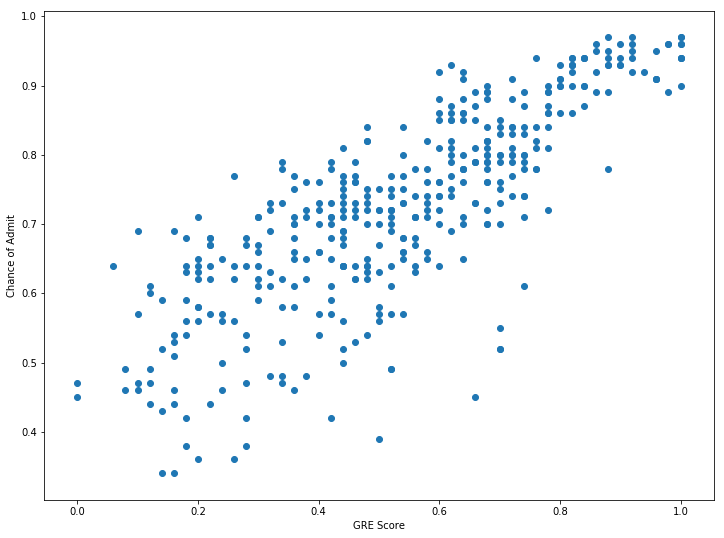

In [4]:
plt.rcParams['figure.figsize'] = (12.0, 9.0)

# Gráfica de dispersión
plt.scatter(x, y)
plt.ylabel("Chance of Admit")
plt.xlabel("GRE Score")
plt.show()

##  Método Analítico (Solución Cerrada) 

El método de regresión lineal, ampliamente utilizado en diversas ramas del conocimiento como inteligencia artificial, economía, biología, etc. Es un algoritmo popular para lograr generar pronósticos de una variable que se busca modelar con base en por lo menos una variable predictora o independiente.\\

Por medio del planteamiento de la función de costo, por mínimos cuadrados ordinarios, es se alcanza la solución para cualquier tipo de regresión como la lineal de una variable, lineal multivariable, cuadrática, etc.\\

Por su relativa sencillez de implementación y flexibilidad para modelar una serie de problemas, la regresión resulta un algoritmo básico para la resolución de problemas donde se busque predecir el siguiente valor de la variable de interés.

Sea la función:
\begin{equation} \label{uno}
y=\sum _{j=1}^{n}(\beta_ {j}x_{j}+b)
\end{equation}

Con vectores columna $x,y$:

 $y=\begin{bmatrix}
    y_1 \\
    y_2 \\
    \vdots \\
    y_K
\end{bmatrix}$

 $x=\begin{bmatrix}
    x_1 \\
    x_2 \\
    \vdots \\
    x_{K}
\end{bmatrix}$ 

La función de costo se define como:

\begin{equation} \label{tres}
E=\sum_{i=1}^{K}||y_{i}-\sum_{j=1}^{n}(\beta_{ij}x_{ij})+b||^{2}
\end{equation}

En donde: $i$ representa la muestra, $j$ representa la variable y $\beta$ el coeficiente que explica el cambio marginal de las variables $x_{j}$

De la ecuación anterior es posible reexpresarla como:
\begin{equation} \label{cuatro}
E=\sum_{i=1}^{K}||y_{i}-y'||^{2}
\end{equation}

Donde $y'$ se define como:
\begin{equation} \label{cinco}
y'=b+x\beta
\end{equation}

Que puede simplificarse aún más de la siguiente forma:
\begin{equation} \label{seis}
y'=x\beta
\end{equation}

$x=\begin{bmatrix}
    1 & x_{1,1} & x_{1,2} & ... & x_{1,n} \\
    1 & x_{2,1} & x_{2,2} & ... & x_{2,n}\\
    \vdots \\
    1 & x_{k,1} & x_{k,2} & ... & x_{k,n}
\end{bmatrix}$

 $\beta=\begin{bmatrix}
    b\\
    \beta _{1}\\
    \beta _{2}\\
    \vdots \\
    \beta _{n}
\end{bmatrix}$

Reexpresando se tiene:

\begin{equation} \label{nueve}
E=||y-x\beta||^{2}
\end{equation}

Cuya representación al desarrollar la norma cuadrática es:
\begin{equation} \label{diez}
E=(y-x\beta)^{T}(y-x\beta)
\end{equation}

\begin{equation} \label{once}
E=(y^{T}-x^{T}\beta^{T})(y-x\beta)
\end{equation}

\begin{equation} \label{doce}
E=(y^{T}y-2\beta^{T}x^{T}y+\beta^{T}x^{T}x\beta)
\end{equation}

Ahora bien, de la eucaucón anterior, se busca llegar al óptimo, por lo que se aplica el operador gradiente para buscar la primera condición necesaria de optimalidad en donde $\nabla E=0$

\begin{equation} \label{trece}
\nabla E=(\nabla y^{T}y-\nabla 2\beta^{T}x^{T}y+\nabla \beta^{T}x^{T}x\beta)
\end{equation}

Dado que los parámetros que buscamos optimizar son las $\beta$, las derivada será respecto a dicha variable tal que:

\begin{equation} \label{catorce}
\nabla E=(0-x^{T}y+x^{T}x\beta)
\end{equation}

Siguiendo lo enunciado de la primera condición de optimalidad
\begin{equation} \label{quince}
0=(0-x^{T}y+x^{T}x\beta)
\end{equation}

Que resulta en:
\begin{equation} \label{dieciseis}
x^{T}y=+x^{T}x\beta
\end{equation}

Y que al despejar $\beta$ se obtiene el cálculo de los $K$ parametros.
\begin{equation} \label{diecisiete}
\beta=(x^{T}x)^{-1}x^{T}y
\end{equation}

Así mismo, es posible calcular la segunda derivada, que representa el Hessiano de la función $E$
\begin{equation} \label{dieciocho}
\nabla^{2} E=(\nabla x^{T}y+ \nabla x^{T}x\beta)
\end{equation}

\begin{equation} \label{diecinueve}
\nabla^{2} E=(x^{T}x)
\end{equation}

Que permite demostrar que nos encontramos en presencia de un mínimo al ser una matriz semipositiva definida que es el símil del críterio de la segunda derivada en cálculo univariable.

In [5]:
def direct_LR(x,y):
    one=np.ones((x.shape[0], 1))
    X=np.concatenate((one,x),axis=1)
    res=inv(X.T.dot(X)).dot(X.T).dot(y)
    return(res)

dire=direct_LR(x,y)
print(dire)
#yhat = x.dot(dire)
Y_pred=dire[0]+dire[1]*x

[[0.45692154]
 [0.4987941 ]]


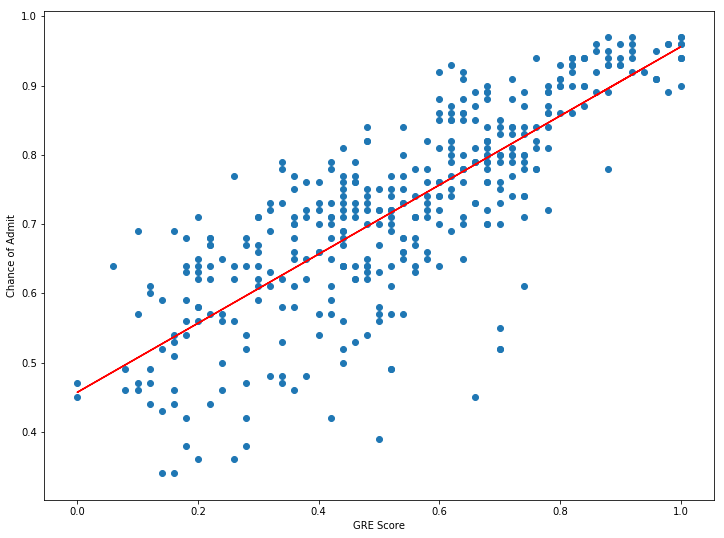

In [6]:
plt.scatter(x, y)
plt.plot(x, Y_pred, color='red')
plt.ylabel("Chance of Admit")
plt.xlabel("GRE Score")
plt.show()

##  Metodo Descenso Gradiente

El caso del descenso gradiente se basa en calcultar iterativamente $n$ veces hasta alcanzar los valores óptimos mediante el siguiente cálculo

$\beta_{new}=\beta_{old}-\alpha *\nabla y$

Donde:
* $\alpha$: Es el parámetro de aprendizaje
* $\nabla y$: Representa el gradiente de la función a optimizar y
* $\beta$: Son los valores que buscamos (pendiente y origen)

Si bien, este método resulta más lento que la solución cerrada, es relevante su conocimiento ya que es posible aplicarlo tanto para confirmación, como en problemas cuya solución no es cerrada.

En conjunto con regresión lineal genera las bases para redes neuronales.


In [7]:
# Definición de los ajustes y parámetros iniciales
epoca = 10000
alfa = 0.1
stop = 1e-8
b_0 = 0
b_1 = 0

# Proceso iterativo
for paso in range(0, epoca):
    #Inicialización del gradiente
    b_0_gradient = 0
    b_1_gradient = 0
    N = float(len(x))
    
    #Iteración para el cálculo del descenso gradiente
    #Se mantiene la información de las betas de la última iteración.
    for i in range(0, len(x)):
        b_0_gradient -= (2/N) * (y[i] - (b_0 + b_1 * x[i]))
        b_1_gradient -= (2/N) * (y[i] - (b_0 + b_1 * x[i])) * x[i]
        
    #Cálculo de los coeficientes Beta0, Beta1
    b_0 = b_0 - (alfa * b_0_gradient)
    b_1 = b_1 - (alfa * b_1_gradient)
    
    #Criterio de paro
    if max(abs(alfa * b_0_gradient), abs(alfa * b_1_gradient)) < stop:
        break
    
# Impresión de los resultados
print("Los valores que se obtienen son:", b_0, b_1, "en pasos", epoca)

Y_pred=b_0+b_1*x

Los valores que se obtienen son: [0.45692222] [0.49879288] en pasos 10000


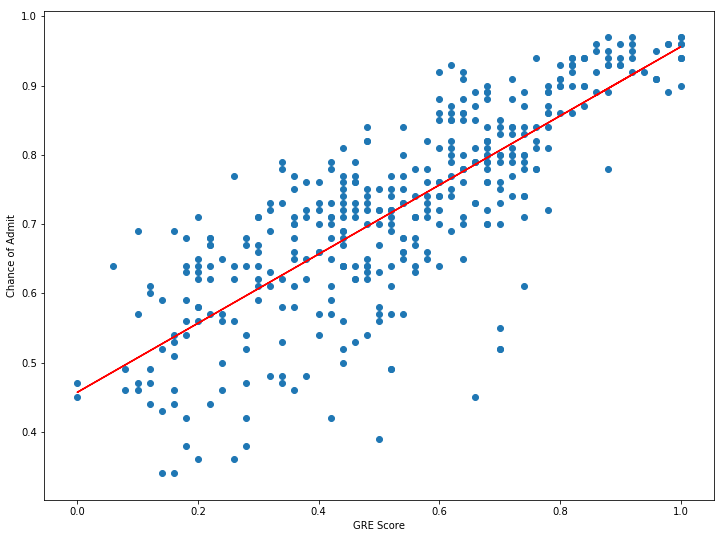

In [8]:
plt.scatter(x, y)
plt.plot(x, Y_pred, color='red')
plt.ylabel("Chance of Admit")
plt.xlabel("GRE Score")
plt.show()

## Metodo Sklearn 

In [9]:
reg = LinearRegression().fit(x, y)
Y_pred = reg.predict(x)
print(reg.coef_)
print(reg.intercept_)

[[0.4987941]]
[0.45692154]


In [10]:
#Como obtener el estadístico t desde sklearn

#Recuperar las betas
params = np.append(reg.intercept_,reg.coef_)
predictions=Y_pred

newX = pd.DataFrame({"Constant":np.ones(len(x))}).join(pd.DataFrame(x))
MSE = (sum((y-predictions)**2))/(len(newX)-len(newX.columns))

#Cálculo de varianza, desviación estandar y el valor t
var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

#Calculo de p valor
p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]

#Redondeo de decimales
sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

#Resultados
myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilites"] = [params,sd_b,ts_b,p_values]
myDF3

##Obtenido desde
##https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression

,Coefficients,Standard Errors,t values,Probabilites
0,0.4569,0.011,42.172,0.0
1,0.4988,0.019,26.843,0.0


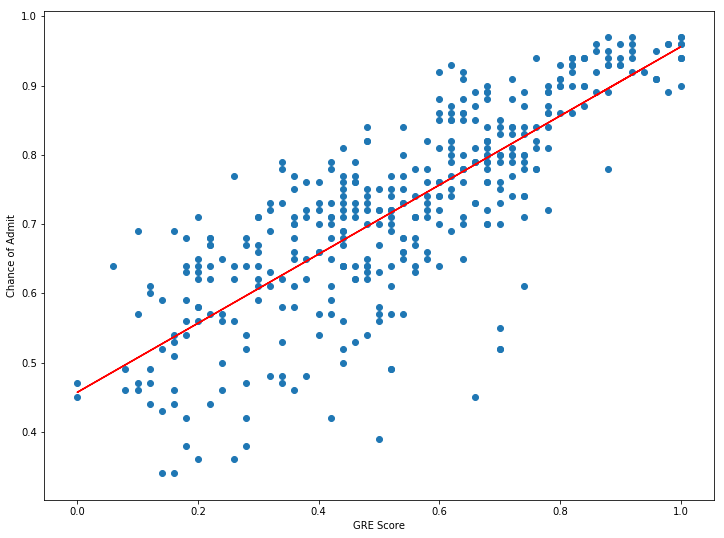

In [11]:
plt.scatter(x, y)
plt.plot(x, Y_pred, color='red')
plt.ylabel("Chance of Admit")
plt.xlabel("GRE Score")
plt.show()

##  Método StatsModel 

In [12]:
#Ingreso del predictor
X = sm.add_constant(x)

#Definición del modelo
model = sm.OLS(y, X).fit()

#Obtención de la predicción
Y_pred = model.predict(X) 

#Resultados
print_model = model.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     720.6
Date:                Tue, 14 Jan 2020   Prob (F-statistic):           2.46e-91
Time:                        21:59:34   Log-Likelihood:                 418.65
No. Observations:                 400   AIC:                            -833.3
Df Residuals:                     398   BIC:                            -825.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4569      0.011     42.172      0.0

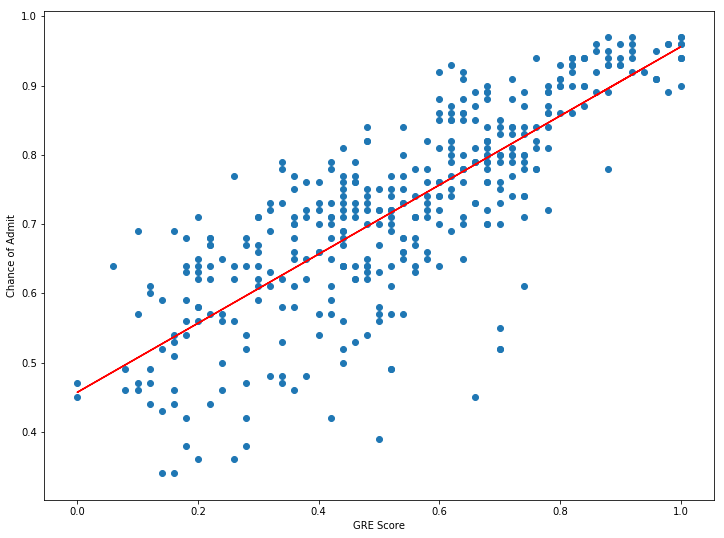

In [13]:
plt.scatter(x, y)
plt.plot(x, Y_pred, color='red')
plt.ylabel("Chance of Admit")
plt.xlabel("GRE Score")
#plt.plot(x, Y_pred, color='green')
plt.show()

## Finalmente

La regresión lineal, como algoritmo supervisado básico, permite la generación de pronósticos rápidos al relacionar dos variables.

Los resultados alcanzados coinciden, salvo por el método de descenso gradiente, sin embargo la diferencia es casi inexistente.

El conocimiento de este algoritmo permite profundizar en otro tipo de regresiones como multiple,logística, geográfica ponderada, etc. Que permiten segmentar (regresión logística), considerar más variables (multiple), o considerar el espacio como una variable relevante (geográfica ponderada), entre otros usos dependiendo del tipo de regresión usada y que tienen una solución relacionada a lo visto con este método.